In [335]:
# Import libaries
import re


In [336]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [337]:
# Importing self-made libaries
import standards as s
import life_cycle_assessment as lc
import LCA_plots as lp
import reload_lib as rl
import non_bio_co2 as nbc
import add_plastic_sheet as aps


lib = [s, lc, lp, nbc, aps]

In [338]:
# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care'
# Specifying the LCIA method
lcia_method = 'recipe'
rl.reload_lib(lib)
flow_legend, database_name, file_name, sheet_name, save_dir, initialization, file_name_unique, db_type = lc.initilization(path, lcia_method)

ValueError: invalid literal for int() with base 10: ''

In [ ]:
database_project, database_name, flows, lcia_method, db_type = initialization
rl.reload_lib(lib)
FU, impact_category, plot_x_axis = lc.LCA_initialization(database_project, database_name, flows, lcia_method, db_type)


Recipe is selected
Initialization is completed


In [ ]:
rl.reload_lib(lib)
df, plot_x_axis_all, impact_categories = lc.quick_LCIA(path, initialization, file_name, file_name_unique, sheet_name)


Recipe is selected
Initialization is completed


In [320]:
df_rearranged = lc.rearrange_dataframe_index(df)

In [321]:
if 'recipe' in lcia_method:
    df_res, df_endpoint = lc.recipe_dataframe_split(df_rearranged)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        if 'ODPinfinite' in  string[0]:
            string[0] = 'ODP'
        elif '1000' in string[0]:
            string[0] = 'GWP'
        plot_x_axis.append(string[0])

else:
    df_res = df_rearranged
    plot_x_axis = plot_x_axis_all

In [322]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_res)
df_col = [df_res.columns[1]]
df_GWP = df_res[df_col]

unique_elements = lc.unique_elements_list(database_name)
colors = s.plot_colors(unique_elements,'turbo')

# 

In [323]:
# colors = [colors_ini[0],
#           colors_ini[3],
#           colors_ini[2],
#           colors_ini[1],
#           colors_ini[4],
#           ]
# for c in colors_ini[5:]:
#     colors.append(c)
inputs = [flow_legend, colors, save_dir, db_type, database_name]

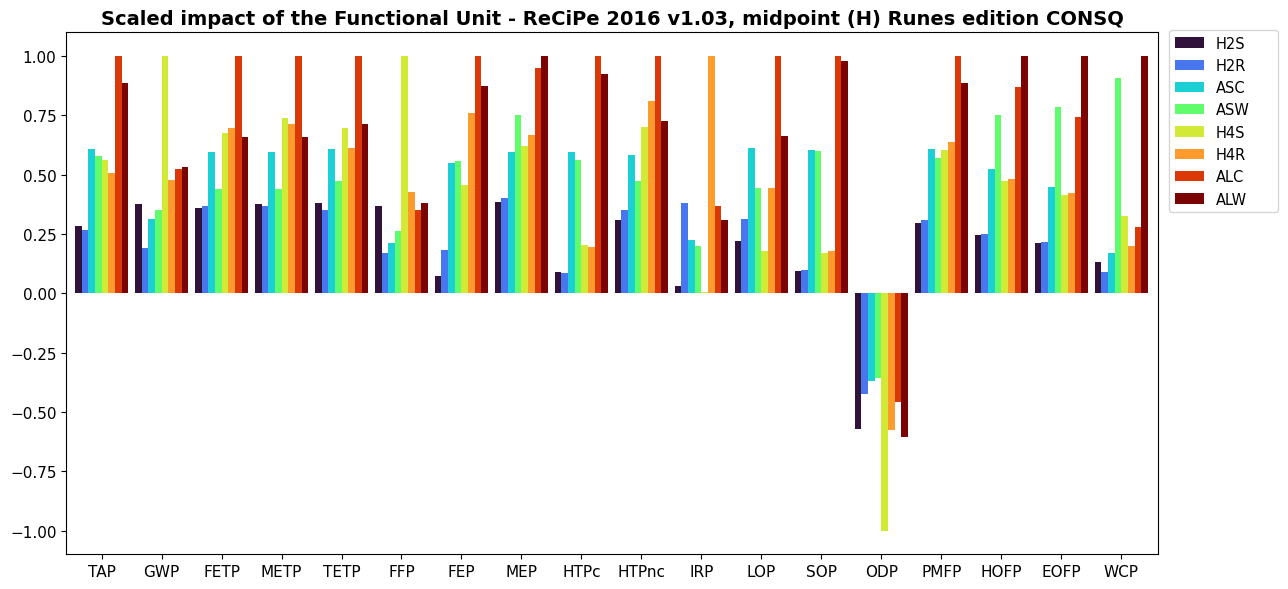

In [ ]:
leg_pos_mid = .655
rl.reload_lib(lib)
lp.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_categories, leg_pos_mid)

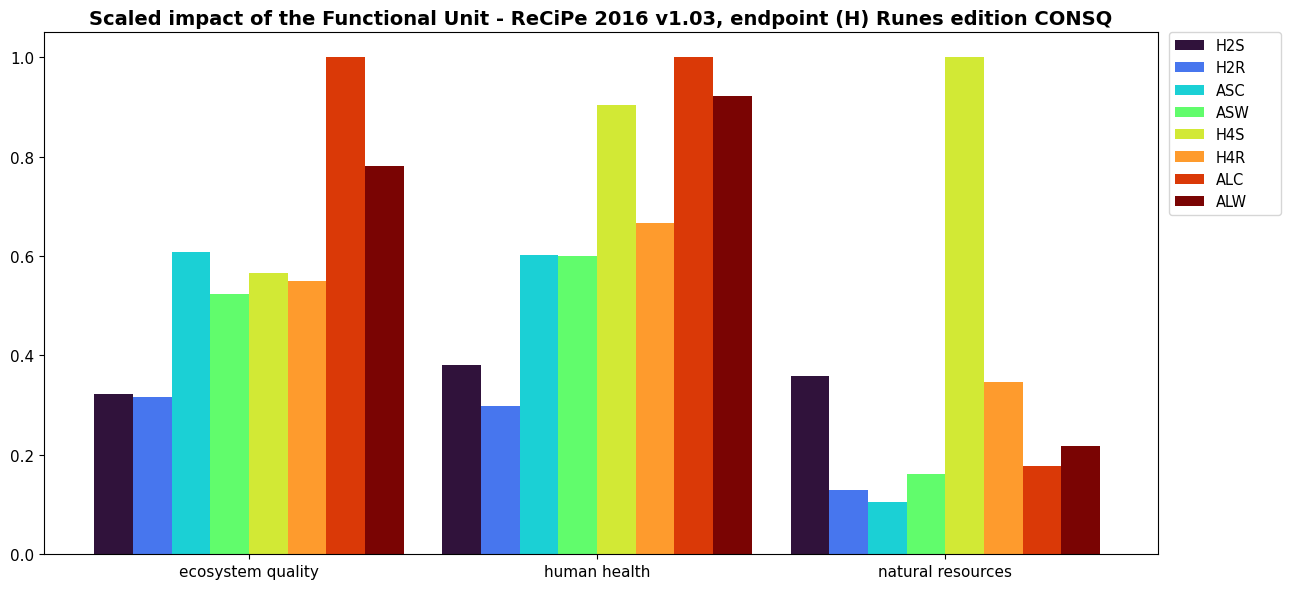

In [ ]:
leg_pos_end = 0.65
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, inputs, impact_categories[-3:], leg_pos_end)


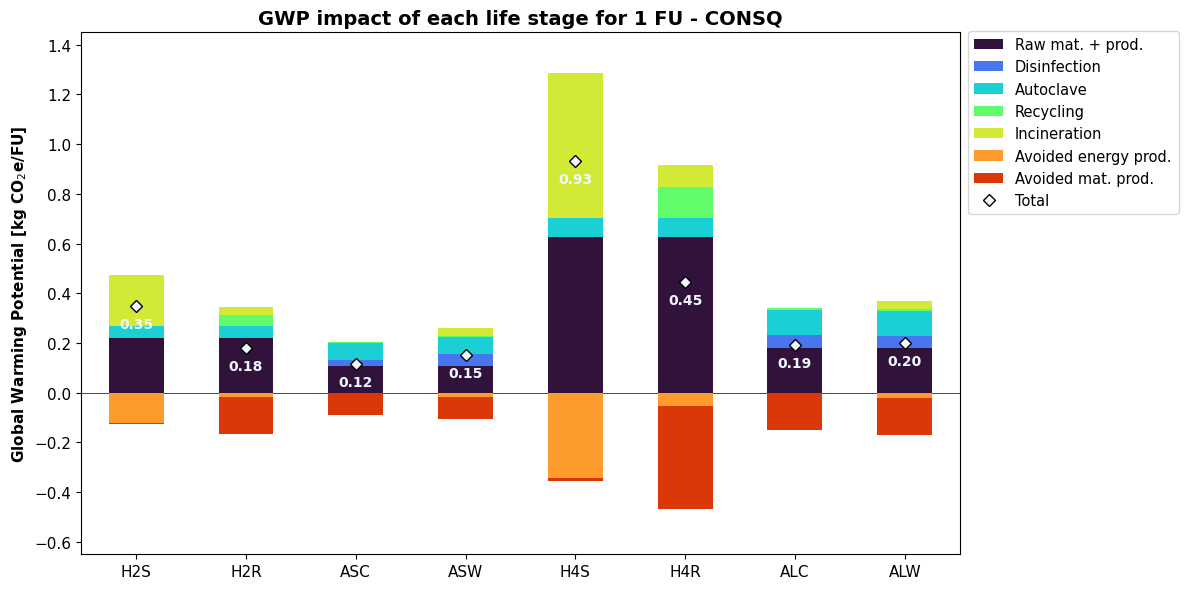

In [ ]:
rl.reload_lib(lib)

y_min = -0.6
y_max = 1.4
step = 0.2
leg_pos = 0.652
marker_offset = 0.1
marker_color = 'aliceblue'
y_axis_values = [y_min, y_max, step, leg_pos, marker_offset, marker_color]
lp.gwp_scenario_plot(df_GWP, inputs, y_axis_values)


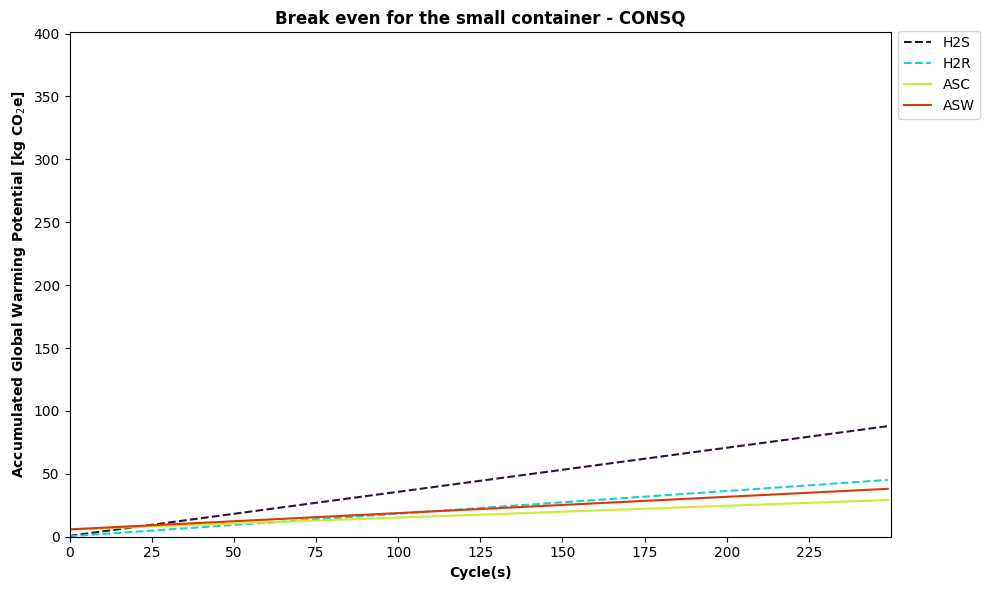

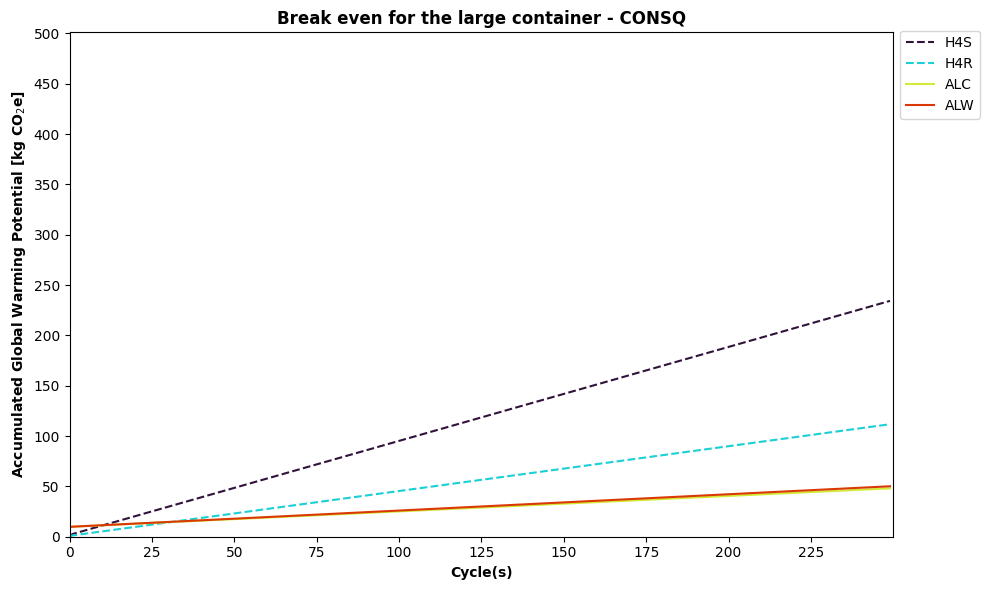

In [327]:
rl.reload_lib(lib)

amount_of_uses = 250
y_max = [400, 500]
ystep = [50, 50]
xstep = 25
break_even_product = 'container'
color_idx = [0, 2, 4, 6]

plot_controls = [amount_of_uses, y_max, ystep, xstep, break_even_product, color_idx]
lp.break_even_graph(df_GWP, inputs, plot_controls)